# Part 1

The following libraries will be used for the first part.

In [86]:
from PIL import Image
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

In [87]:
The grey scaled image can be seen below.

SyntaxError: invalid syntax (<ipython-input-87-a9a269d059f2>, line 1)

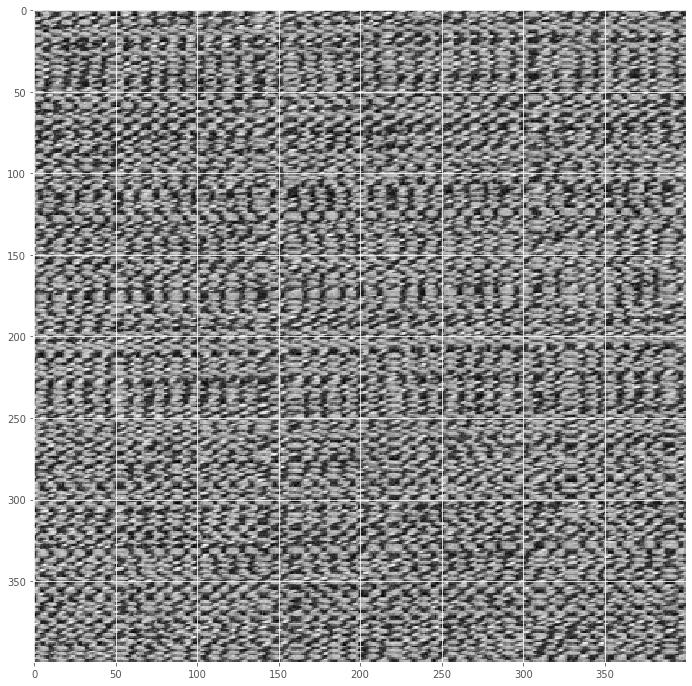

In [88]:
img = Image.open("C:/Users/Erdem Çağrı Utku/Desktop/group_9_grey.jpg")
plt.figure(figsize=[12,12])
plt.imshow(img)

The greyscaled image is copied to matrixr and matrixc for the operations on rows and columns.

In [89]:
matrix = np.array(img)
matrixr=np.copy(matrix)
matrixc=np.copy(matrix)

## Task A

The mean and variances for each row is stored in the vectors mean_row and std_row.  

In [90]:
mean_row=np.zeros(399)
std_row=np.zeros(399)
for i in range(0,399):
    mean_row[i]=np.mean(matrix[i,:,0])
    std_row[i]=np.std(matrix[i,:,0])

The histogram of the mean values for the rows of the greyscaled picture is drawn as following.

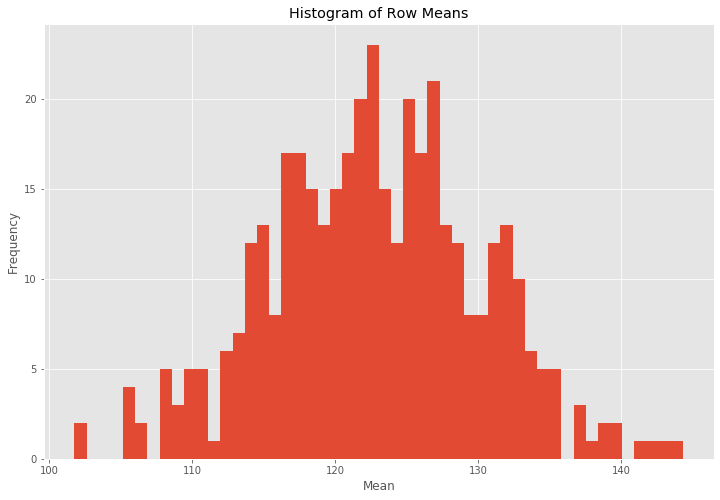

In [91]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(mean_row,bins=50)
plt.title('Histogram of Row Means')
plt.ylabel('Frequency')
plt.xlabel('Mean')
plt.show()

Similarly, the histogram for variances is shown below.

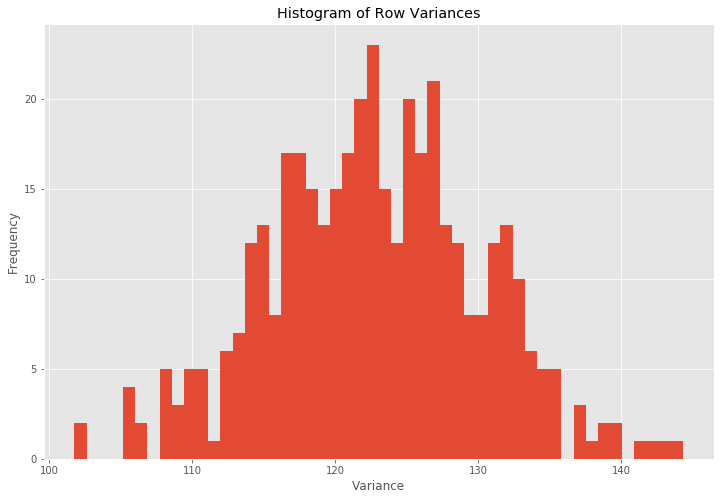

In [92]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(mean_row,bins=50)
plt.title('Histogram of Row Variances')
plt.ylabel('Frequency')
plt.xlabel('Variance')
plt.show()

The code below makes the pixels that do not comply with six sigma limits black color.

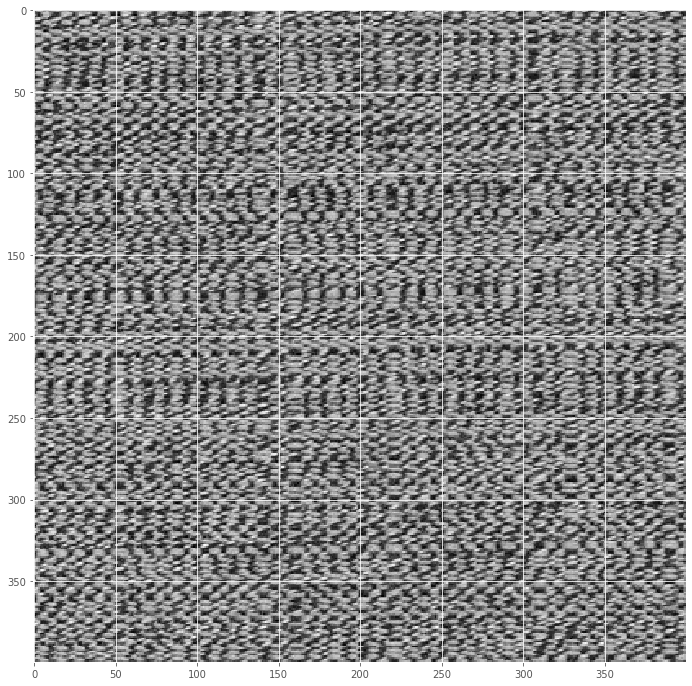

In [93]:
for i in range(0,399): 
    for j in range(0,399):
        if(matrixr[i,j,0]<(mean_row[i]-3*std_row[i]) or matrixr[i,j,0]>(mean_row[i]+3*std_row[i])):
            matrixr[i,j,:]=[0,0,0]

plt.figure(figsize=[12,12])
plt.imshow(matrixr)

In [ ]:
The original and modified figures are shown below.

plt.figure(figsize=(12, 12), constrained_layout=False)
plt.subplot(1,2,1, title="Original Picture" )
plt.imshow(matrix)
plt.subplot(1,2,2, title="Modified Picture")
plt.imshow(matrixr)
plt.tight_layout()
plt.show()

Since the figures seem highly similar, it is clear that most of the pixels are within the 6 sigma limits, meaning that the process is most probably in-control. The average run length of finding an out-of-control pixel, therefore, is quite high. To check the correction of the control limits the test is performed for 2 sigma limits below, and the new shape has more black pixels than the one with 6 sigma limits, as expected.

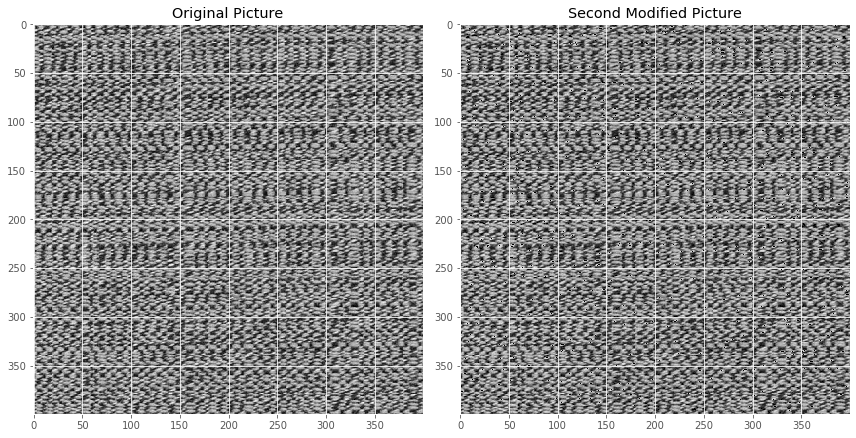

In [94]:
for i in range(0,399): 
    for j in range(0,399):
        if(matrixr[i,j,0]<(mean_row[i]-1*std_row[i]) or matrixr[i,j,0]>(mean_row[i]+1*std_row[i])):
            matrixr[i,j,:]=[0,0,0]

plt.figure(figsize=(12, 12), constrained_layout=False)
plt.subplot(1,2,1, title="Original Picture" )
plt.imshow(matrix)
plt.subplot(1,2,2, title="Second Modified Picture")
plt.imshow(matrixr)
plt.tight_layout()
plt.show()

## Task B

The mean and variances for each column is stored in the vectors mean_col and std_col. The histograms for the mean and variance of colums is shown below.  

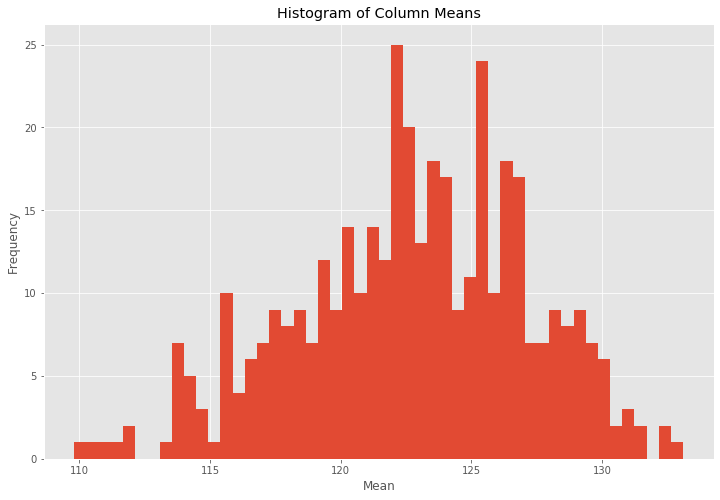

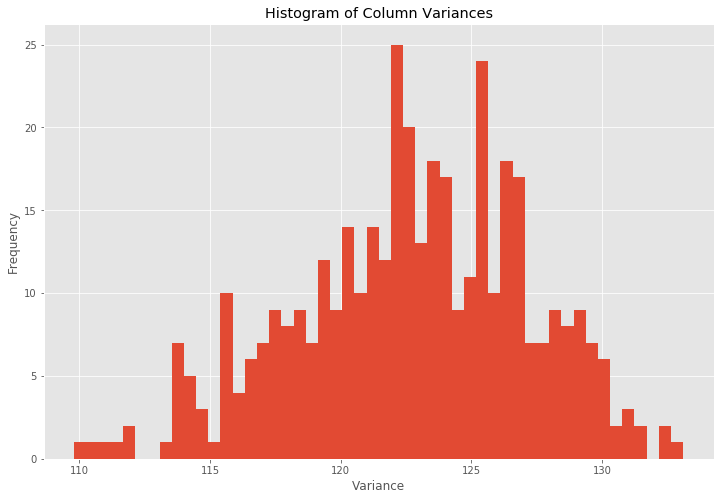

In [96]:
mean_col=np.zeros(399)
std_col=np.zeros(399)

for i in range(0,399):
    mean_col[i]=np.mean(matrix[:,i,:])
    std_col[i]=np.std(matrix[:,i,:])
    
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(mean_col,bins=50)
plt.title('Histogram of Column Means')
plt.ylabel('Frequency')
plt.xlabel('Mean')
plt.show()

plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(mean_col,bins=50)
plt.title('Histogram of Column Variances')
plt.ylabel('Frequency')
plt.xlabel('Variance')
plt.show()

The black coloring operation for the colums is performed in the following code.

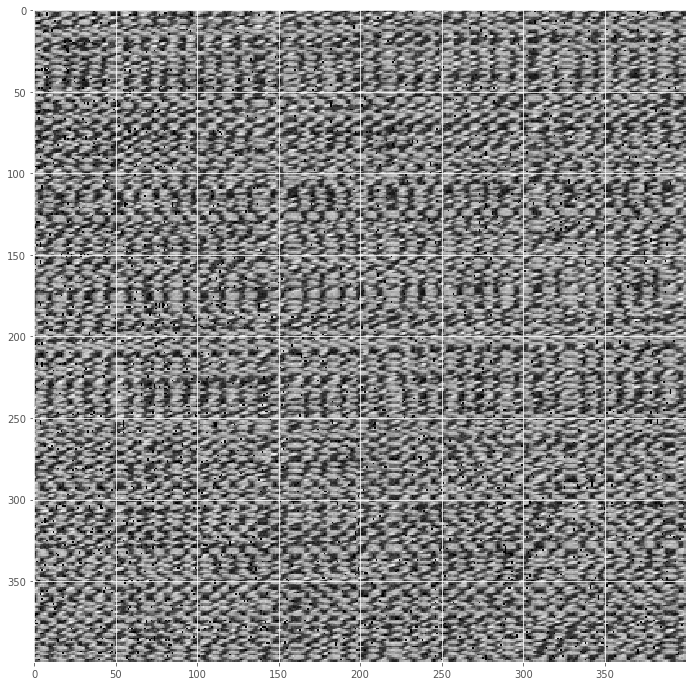

In [95]:
for i in range(0,399): 
    for j in range(0,399):
        if(matrixc[j,i,0]<(mean_col[i]-3*std_col[i]) or matrixc[j,i,0]>(mean_col[i]+3*std_col[i])):
            matrixc[j,i,:]=[0,0,0]
plt.figure(figsize=[12,12])
plt.imshow(matrixc)

The original and modified plots are displayed on the following plot.

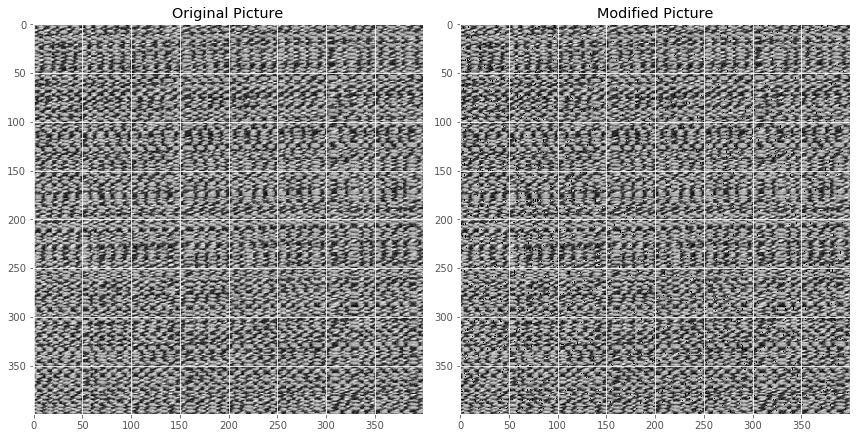

In [97]:
plt.figure(figsize=(12, 12), constrained_layout=False)
plt.subplot(1,2,1, title="Original Picture" )
plt.imshow(matrix)
plt.subplot(1,2,2, title="Modified Picture")
plt.imshow(matrixc)
plt.tight_layout()
plt.show()

Similar to the row operations, there does not seem much of a difference between the two plots. Therefore vast majority of the pixels are within 6-sigma limits, showing that process is probably in control. The process is repeated below for 2 sigma limits, in which case the average run legth until finding an out-of-control pixel is substentially lower.

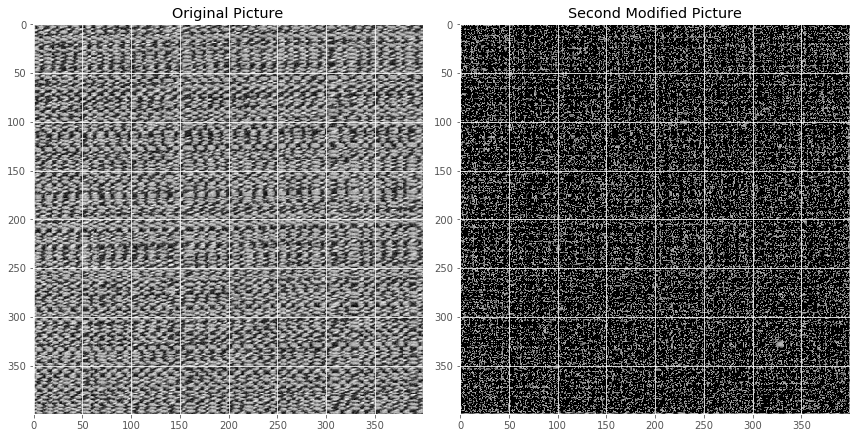

In [99]:
for i in range(0,399): 
    for j in range(0,399):
        if(matrixc[j,i,0]<(mean_col[i]-1*std_col[i]) or matrixc[j,i,0]>(mean_col[i]+1*std_col[i])):
            matrixc[j,i,:]=[0,0,0]

plt.figure(figsize=(12, 12), constrained_layout=False)
plt.subplot(1,2,1, title="Original Picture" )
plt.imshow(matrix)
plt.subplot(1,2,2, title="Second Modified Picture")
plt.imshow(matrixc)
plt.tight_layout()
plt.show()